<a href="https://colab.research.google.com/github/mouleshgs/ml/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
data = data[['Close']]  # Use only 'Close' prices


/tmp/ipython-input-15-3098171268.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 📌 Step 4: Create sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [17]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]  # Overlap needed for sequences

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# 📌 Step 6: Reshape for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0371
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1643e-04
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5869e-04
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5598e-04
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5143e-04
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9746e-04
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2434e-04
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.5745e-04
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0282e-04
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4911e-04
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.9406e-04
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.7226e-04
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3013e-04
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7674e-04
Epoch 15/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


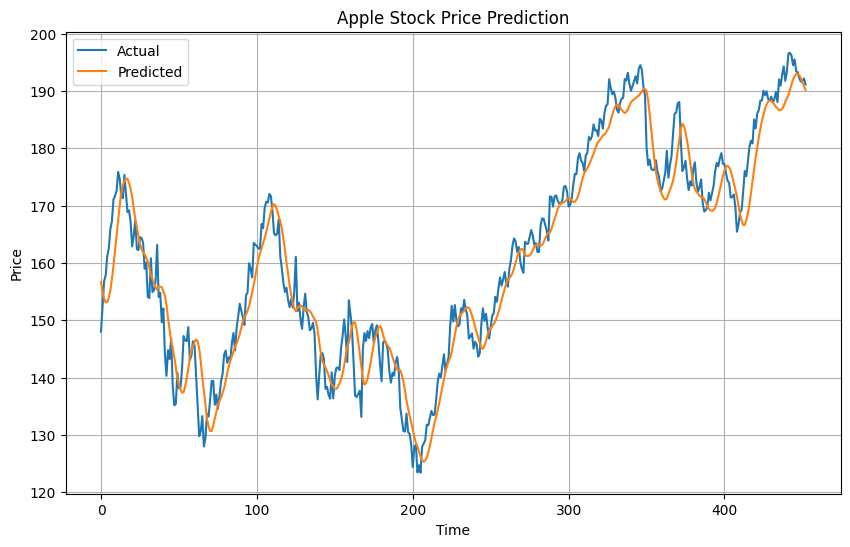

In [19]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 Step 9: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()